In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the data
df = pd.read_csv('bank.csv',delimiter=';')

In [4]:
# A glance of the data.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Analysis.

## Understanding the data.
- **The data is of a Portuguese bank's Marketing Camping where they comomunicated with their Customers on a phone call for selling a term deposit.**

- What is a term deposit?<br>
⇨ *A Term Deposit(Fixed Deposit), one is allowed to deposit a lump sum amount with a financial institution or bank for a particular period and at a pre-decided interest rate. This period often ranges from 1 to 10 years. It is one of the most secure investment options in the market.*

- The main goal is to build a predictive model that can predict whether the customer will buy or not the Term Deposit using Past data.

## An Overview of the Variables.
``` 
# bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no") [Target Variable]
```

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
len(df)

4521

NO null values are present.

In [7]:
len(df[df.duplicated()])

0

NO duplicate Values are present.

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


From the above table we get a basic idea about the numerical columns.

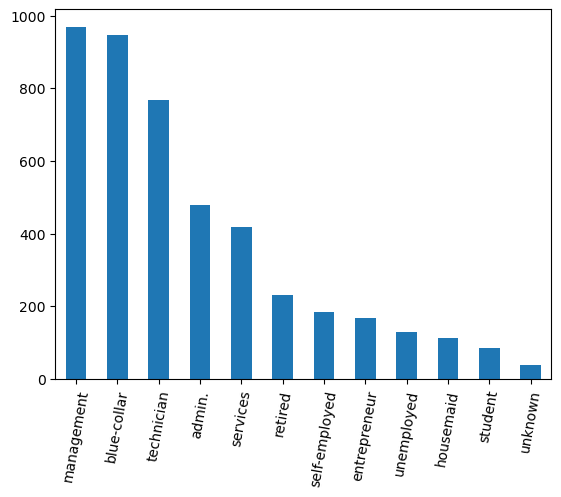

In [9]:
# Number of customers working in different Feilds.
df.job.value_counts().plot(kind='bar')
plt.xticks(rotation=80);

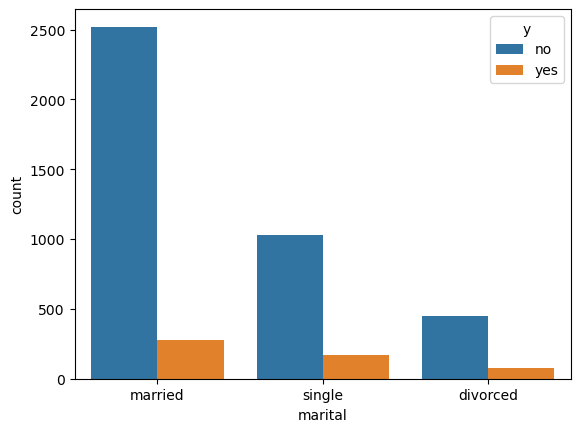

In [10]:
# Number of customers by maritial Status.
sns.countplot(data=df,x='marital',hue=df.y);

The above chart shows the number of married,single and divorced customers who have subscribed or not.

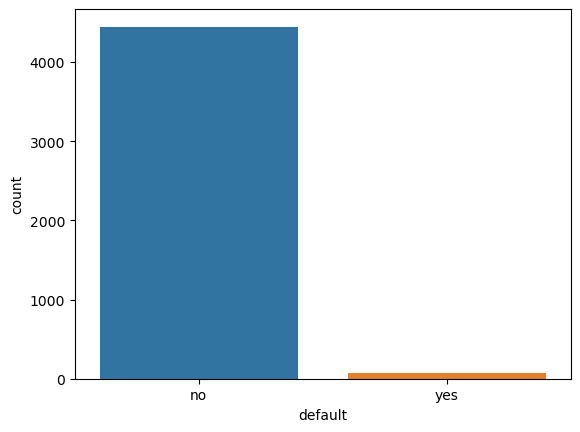

In [11]:
# How many customers have default.
sns.countplot(data=df,x='default');

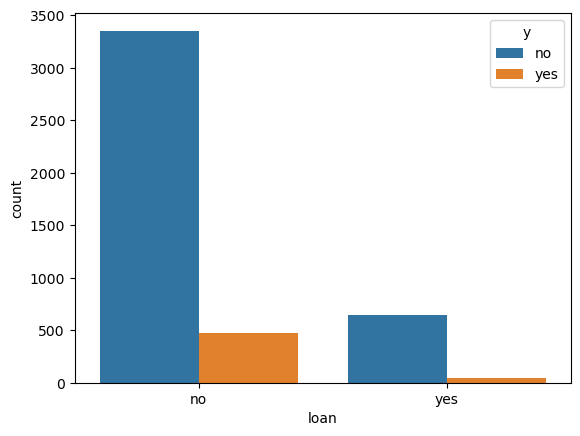

In [12]:
# how many customers have loan and they have subscribed to the A FD, y = subscibed.
sns.countplot(data=df,x='loan',hue=df.y);

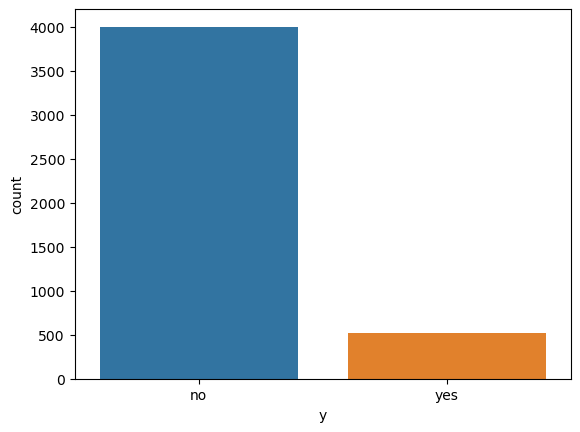

In [13]:
# count of customers that subscribed the plan.
sns.countplot(data=df,x='y');

<font color='#F55050'>*From the Above graph it is clear that the dataset is imbalanced, I will use the proper techniques to solve this problem later.*</font>

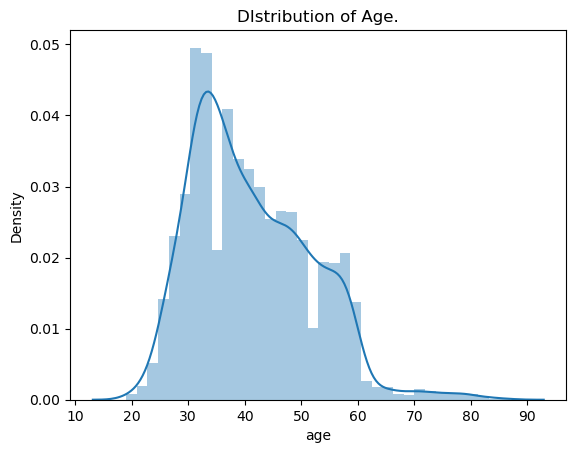

In [14]:
plt.title('DIstribution of Age.')
sns.distplot(df.age);

For Age the data seem to be positive skewed.

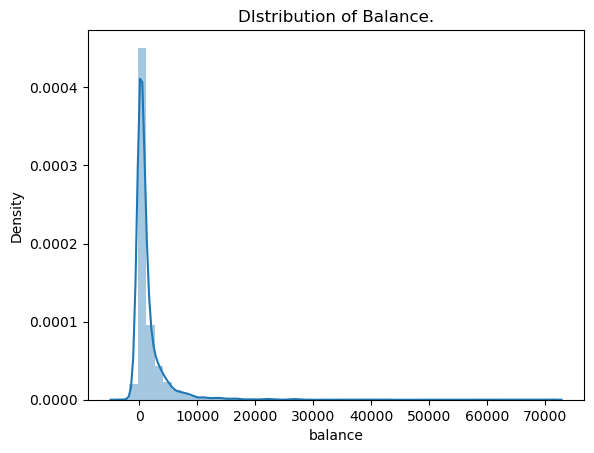

In [15]:
plt.title('DIstribution of Balance.')
sns.distplot(df.balance);

for balance the data is postive skewed.

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data preProcessing.

In [17]:
# Converting catergorical columns to numerical values.
from sklearn.preprocessing import LabelEncoder
en_job = LabelEncoder()
en_mar = LabelEncoder()
en_edu = LabelEncoder()
en_def = LabelEncoder()
en_hou = LabelEncoder()
en_loa = LabelEncoder()
en_con = LabelEncoder()
en_pou = LabelEncoder()

In [18]:
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
y_dict = {'no':0,'yes':1}

In [19]:
final_df = df.copy()

In [20]:
final_df['month'] = df['month'].replace(month_dict) 
final_df['job']= en_job.fit_transform(final_df['job'])
final_df['marital']= en_mar.fit_transform(final_df['marital'])
final_df['education']= en_edu.fit_transform(final_df['education'])
final_df['default']= en_def.fit_transform(final_df['default'])
final_df['housing']= en_hou.fit_transform(final_df['housing'])
final_df['loan']= en_loa.fit_transform(final_df['loan'])
final_df['contact']= en_con.fit_transform(final_df['contact'])
final_df['poutcome']= en_pou.fit_transform(final_df['poutcome'])
final_df['y']= df['y'].replace(y_dict)

## Normalizing the data is always a good option.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
final_df[['balance', 'duration', 'pdays']] = scaler.fit_transform(final_df[['balance', 'duration', 'pdays']])

In [23]:
## Preprocessing the test data.

In [24]:
test_df  = pd.read_csv('test.csv')

In [25]:
test_df['month'] = test_df['month'].replace(month_dict) 
test_df['job']= en_job.transform(test_df['job'])
test_df['marital']= en_mar.transform(test_df['marital'])
test_df['education']= en_edu.transform(test_df['education'])
test_df['default']= en_def.transform(test_df['default'])
test_df['housing']= en_hou.transform(test_df['housing'])
test_df['loan']= en_loa.transform(test_df['loan'])
test_df['contact']= en_con.transform(test_df['contact'])
test_df['poutcome']= en_pou.transform(test_df['poutcome'])

In [26]:
test_df[['balance', 'duration', 'pdays']] = scaler.transform(test_df[['balance', 'duration', 'pdays']])

In [27]:
final_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,0.121072,0,0,0,19,10,-0.711861,1,-0.407218,0,3,0
1,33,7,1,1,0,1.118644,1,1,0,11,5,-0.169194,1,2.989044,4,0,0
2,35,4,2,2,0,-0.024144,1,0,0,16,4,-0.303898,1,2.899143,1,0,0
3,30,4,1,2,0,0.017726,1,1,2,3,6,-0.250017,4,-0.407218,0,3,0
4,59,1,1,1,0,-0.472753,1,0,2,5,5,-0.146102,1,-0.407218,0,3,0


In [28]:
test_df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,4,1,2,0,-0.395991,1,0,2,5,5,-0.480939,1,-0.407218,0,3
1,2,28,4,2,2,0,-0.324214,1,1,2,5,5,-0.180740,1,-0.407218,0,3
2,3,42,2,0,2,1,-0.472088,1,0,2,5,5,0.446598,1,-0.407218,0,3
3,4,58,5,1,0,0,-0.432544,1,0,2,5,5,-0.823473,1,-0.407218,0,3
4,5,43,9,2,1,0,-0.275697,1,0,2,5,5,-0.804230,1,-0.407218,0,3


# Feature Selection.

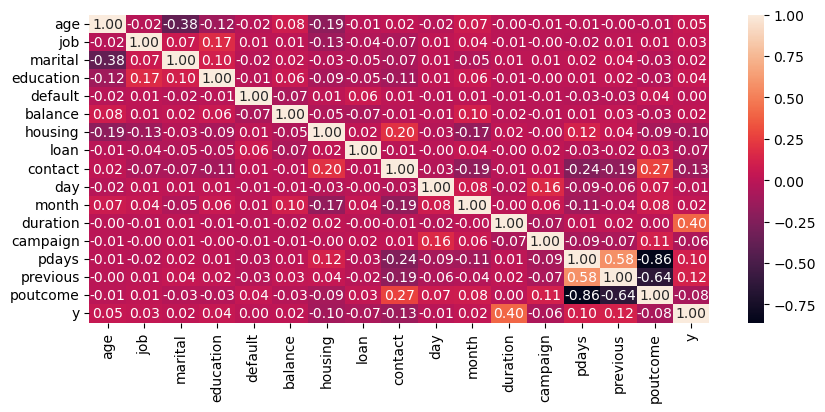

In [29]:
# first lets see the correlation.
plt.figure(figsize=(10,4))
sns.heatmap(final_df.corr(),annot=True,fmt='.2f');

From the above graph we can see that `maritial_status, default, balance, day,month` Have very less or negligible effect on the target column.

### Using Ensemble methods for getting the feature importance score.

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()

In [35]:
X = final_df.drop('y',axis='columns')
Y = final_df['y']

In [36]:
model.fit(X,Y)

ExtraTreesClassifier()

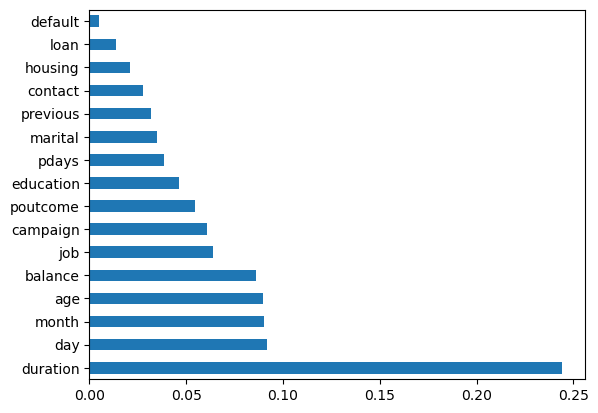

In [47]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(16).plot(kind='barh')
plt.show()

From the above graph we can see the importance of our features with `duration` ranking at top and `default` at the bottom.

### Inforamtion Gain Based feature selection.

In [48]:
from sklearn.feature_selection import mutual_info_classif

In [49]:
mutual_info=mutual_info_classif(X,Y)

In [50]:
feature_importance=pd.Series(mutual_info,index=X.columns)
feature_importance.sort_values(ascending=False)

duration     0.069546
pdays        0.031022
poutcome     0.022730
month        0.015866
contact      0.011598
campaign     0.010407
balance      0.009788
previous     0.009163
age          0.008658
day          0.006656
job          0.005687
housing      0.005365
marital      0.004520
default      0.000807
education    0.000000
loan         0.000000
dtype: float64

From Analyzing above tables I can conclude that `duration` is the most important feature and features such as `default,loan,maritial,day,education` have negligible effect on the target variable and can be removed from the dataset to reduce the complexity of the ML model.

In [54]:
# dropping the features.
final_df=final_df.drop(['default','marital','day'],axis=1)

# Solving the Imbalanced Dataset Problem.

In [128]:
final_df.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

So we can see that the classes are imbalanced with 7:1 ratio.

- The techniques to solve imbalanced datasets are:

1. Resampling: This involves either oversampling the minority class or undersampling the majority class to balance the dataset.

2. Synthetic Data Generation: This involves generating new samples for the minority class using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

3. Modifying the Performance Metric: Instead of using accuracy as the performance metric, other metrics such as precision, recall, F1-score, or AUC-ROC can be used, which are less sensitive to class imbalance.

4. Using Ensemble Methods: Ensemble methods such as bagging and boosting can be used to create multiple models and combine them to improve performance on imbalanced datasets.

5. Cost-Sensitive Learning: This involves assigning a different cost or weight to misclassifying different classes, so that the model is penalized more for misclassifying the minority class.

6. Anomaly Detection: In anomaly detection methods, the minority class is considered as the abnormal class, and the majority class is considered as the normal class.

7. Using different models: Some models are built to handle imbalanced datasets like Decision Trees, Random Forest, SVM with class weighting or cost-sensitive learning.

### I will Use Smote to generate new samples.
- Q. What is smote?<br>
⇒ *SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm for handling imbalanced datasets in machine learning. The goal of SMOTE is to balance class distribution by generating synthetic samples of the minority class. This is done by selecting a sample from the minority class and its k-nearest neighbors, then interpolating a new sample at a randomly selected point between the sample and one of its neighbors.<br>
SMOTE works by oversampling the minority class by creating "synthetic" examples rather than by over-repetition. By creating synthetic samples, SMOTE helps to avoid the problem of overfitting that can occur when using traditional oversampling methods.*

In [57]:
X = final_df.drop('y',axis='columns')
Y = final_df['y']

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

0    4000
1    4000
Name: y, dtype: int64

#### splitting the data for evaluation.

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

## Model Building.

### First lets understand the Evaluation metrics.

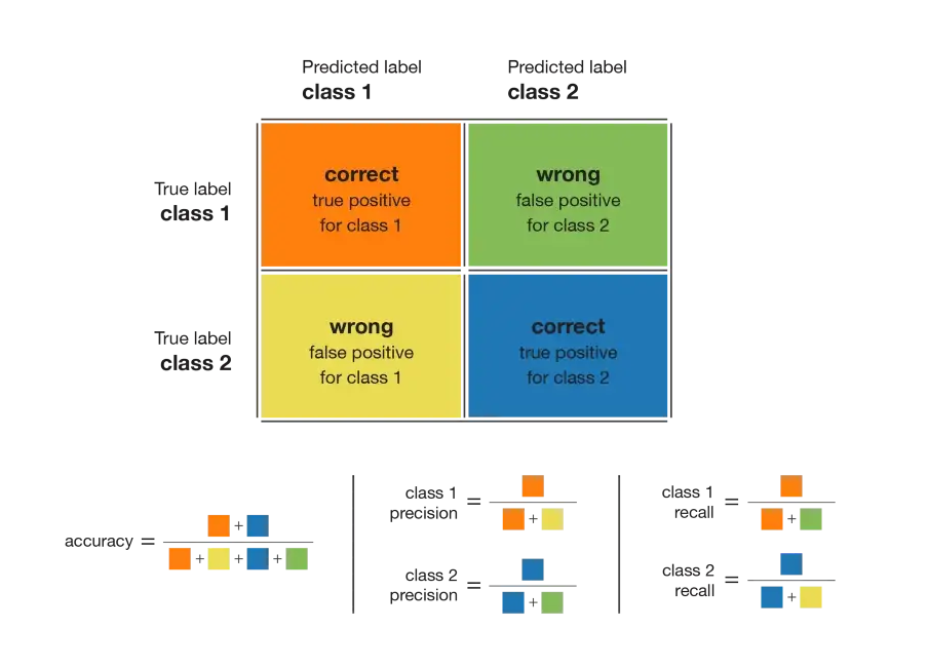

lets consider the following confusion matrix.

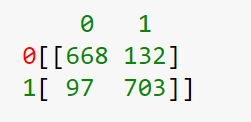



- 0 represents that the customer will not subscribe to the term deposit.
- 1 represents that the customer will subscribe to the term deposit.

- From the matrix True positive rate is 668 and false positive rate is 97, and true negative rate is 703 and false negative rate is 132.
- it means that 668 datapoints were predicted to be class 0 and they were of class 0 while 97 datapoints were predicted to be of class 0 but they were of class 1.
- also 703 datapoints were predicted to be class 1 and they were of class 1 while 132 datapoints were predicted to be of class 1 but were of class 0.
- False Positive = type1 error (in our case it means that the customer will not subscribe but the models says the customer will subscribe).
- False Negative = type2 error(in our case it means that the customer will subscribe but the model says the customer will not).
- so our aim would be to reduce type 2 error.
- precision = precision is a measure of how many of the items a classifier identifies as positive are actually positive.(TP/(TP+FP))
- Recall = recall is a measure of how many of the actual positive items a classifier is able to identify. (TP/(TP+FN))
- lets calculate precision for class 0 = 668/668+97 = 98.
- lets calculate precision for class 1 = 703/703+132 = 133.
- lets calculate recall for class 0 = 668/668+132 = 133.
- lets calculte recall for class 1 = 703/703+97 = 98.



In [139]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [140]:
# creating a function for checking the scores of different model, so that I dont have to write code everytime.
def demo_models(Model,X_TRAIN,X_TEST,Y_TRAIN,Y_TEST):
    model = Model
    model.fit(X_TRAIN,Y_TRAIN)
    a=confusion_matrix(Y_TRAIN,model.predict(X_TRAIN))
    b=f1_score(Y_TRAIN,model.predict(X_TRAIN),average='weighted')
    e=precision_score(Y_TRAIN,model.predict(X_TRAIN))
    f=recall_score(Y_TRAIN,model.predict(X_TRAIN))
    c=confusion_matrix(Y_TEST,model.predict(X_TEST))
    d=f1_score(Y_TEST,model.predict(X_TEST),average='weighted')
    g=precision_score(Y_TEST,model.predict(X_TEST))
    h=recall_score(Y_TEST,model.predict(X_TEST))
    return(print(f'''•The Summary for 👉{Model} is:- \n
    → For Training data :  
        ‣ Confusion_matrix =  \n {a} \n  
        ‣ Precision = {'%.4f'%e}
        ‣ recall = {'%.4f'%f}
        ‣ f1_score  = {'%.4f'%b}\n
        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = \n {c} 
        ‣ Precision = {'%.4f'%g}
        ‣ recall = {'%.4f'%h}
        ‣ f1_score  = {'%.4f'%d}'''))

In [141]:
# Logistic Regression
demo_models(LogisticRegression(),X_train, X_test, y_train, y_test)

•The Summary for 👉LogisticRegression() is:- 

    → For Training data :  
        ‣ Confusion_matrix =  
 [[2659  541]
 [ 441 2759]] 
  
        ‣ Precision = 0.8361
        ‣ recall = 0.8622
        ‣ f1_score  = 0.8465

        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = 
 [[668 132]
 [ 97 703]] 
        ‣ Precision = 0.8419
        ‣ recall = 0.8788
        ‣ f1_score  = 0.8568


In [142]:
demo_models(DecisionTreeClassifier(),X_train, X_test, y_train, y_test)

•The Summary for 👉DecisionTreeClassifier() is:- 

    → For Training data :  
        ‣ Confusion_matrix =  
 [[3200    0]
 [   0 3200]] 
  
        ‣ Precision = 1.0000
        ‣ recall = 1.0000
        ‣ f1_score  = 1.0000

        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = 
 [[698 102]
 [ 74 726]] 
        ‣ Precision = 0.8768
        ‣ recall = 0.9075
        ‣ f1_score  = 0.8900


In [143]:
demo_models(GradientBoostingClassifier(),X_train, X_test, y_train, y_test)

•The Summary for 👉GradientBoostingClassifier() is:- 

    → For Training data :  
        ‣ Confusion_matrix =  
 [[2810  390]
 [ 221 2979]] 
  
        ‣ Precision = 0.8842
        ‣ recall = 0.9309
        ‣ f1_score  = 0.9045

        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = 
 [[684 116]
 [ 54 746]] 
        ‣ Precision = 0.8654
        ‣ recall = 0.9325
        ‣ f1_score  = 0.8936


In [144]:
demo_models(SVC(),X_train, X_test, y_train, y_test)

•The Summary for 👉SVC() is:- 

    → For Training data :  
        ‣ Confusion_matrix =  
 [[2601  599]
 [ 428 2772]] 
  
        ‣ Precision = 0.8223
        ‣ recall = 0.8662
        ‣ f1_score  = 0.8394

        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = 
 [[656 144]
 [105 695]] 
        ‣ Precision = 0.8284
        ‣ recall = 0.8688
        ‣ f1_score  = 0.8443


In [145]:
demo_models(GaussianNB(),X_train, X_test, y_train, y_test)

•The Summary for 👉GaussianNB() is:- 

    → For Training data :  
        ‣ Confusion_matrix =  
 [[1916 1284]
 [ 312 2888]] 
  
        ‣ Precision = 0.6922
        ‣ recall = 0.9025
        ‣ f1_score  = 0.7447

        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = 
 [[482 318]
 [ 67 733]] 
        ‣ Precision = 0.6974
        ‣ recall = 0.9163
        ‣ f1_score  = 0.7533


##### lets consider F1 score so Gradiant Boosting performs best, Now I will create a final model and fine tune its hyperpararameters.

In [146]:
from sklearn.model_selection import GridSearchCV

In [165]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [166]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [167]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300}
0.9099673463032453


In [168]:
y_pred = grid_search.predict(X_test)

In [169]:
acc = f1_score(y_test, y_pred)
print(f"F1score: {acc:.2f}")

F1score: 0.91


'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300

In [173]:
demo_models(GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_leaf= 2, 
                                       min_samples_split= 6, n_estimators= 300),
                                        X_train, X_test, y_train, y_test)

•The Summary for 👉GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=6,
                           n_estimators=300) is:- 

    → For Training data :  
        ‣ Confusion_matrix =  
 [[2952  248]
 [ 120 3080]] 
  
        ‣ Precision = 0.9255
        ‣ recall = 0.9625
        ‣ f1_score  = 0.9425

        -------------------------------
    → For Validation data :   
        ‣ Confusion_matrix = 
 [[699 101]
 [ 44 756]] 
        ‣ Precision = 0.8821
        ‣ recall = 0.9450
        ‣ f1_score  = 0.9093


### Building A final model.

In [174]:
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_leaf= 2, 
                                       min_samples_split= 6, n_estimators= 300)

In [175]:
model.fit(X,Y)

GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=6,
                           n_estimators=300)

In [179]:
test_df = test_df.drop(['default','marital','day'],axis=1)

In [184]:
predictions=model.predict(test_df.iloc[:,1:])

In [186]:
test_df['y']= predictions

In [190]:
output=test_df[['Id','y']]

In [192]:
output.to_csv("Sumission.csv",index=False)

In [195]:
# Result
output

,Id,y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
422,423,0
423,424,1
424,425,1
425,426,0


---